<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differnt-forms-of-$-f(R_\alpha,-K_\alpha)$-at-different-values-of-$R_\alpha$" data-toc-modified-id="Differnt-forms-of-$-f(R_\alpha,-K_\alpha)$-at-different-values-of-$R_\alpha$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differnt forms of $ f(R_\alpha, K_\alpha)$ at different values of $R_\alpha$</a></span></li><li><span><a href="#simulations-of-quadratic-resource-dynamics-$R_\alpha(K_\alpha-R_\alpha)$-in-one-dimension-at-different-intitial-conditions" data-toc-modified-id="simulations-of-quadratic-resource-dynamics-$R_\alpha(K_\alpha-R_\alpha)$-in-one-dimension-at-different-intitial-conditions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>simulations of quadratic resource dynamics $R_\alpha(K_\alpha-R_\alpha)$ in one dimension at different intitial conditions</a></span></li><li><span><a href="#Check-about-R(N)=K/(1+N*C)-about-Lyapunov-function-in-linear-resource-dynamics" data-toc-modified-id="Check-about-R(N)=K/(1+N*C)-about-Lyapunov-function-in-linear-resource-dynamics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check about R(N)=K/(1+N*C) about Lyapunov function in linear resource dynamics</a></span></li><li><span><a href="#Simulation-about-two-speices:-Lyapunov-Function-in-different-dynamics" data-toc-modified-id="Simulation-about-two-speices:-Lyapunov-Function-in-different-dynamics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simulation about two speices: Lyapunov Function in different dynamics</a></span><ul class="toc-item"><li><span><a href="#Oscillation-at-quadratic-resource-dynamics" data-toc-modified-id="Oscillation-at-quadratic-resource-dynamics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Oscillation at quadratic resource dynamics</a></span></li><li><span><a href="#Consumed-power-decreases-at-quadratic-resource-dynamics" data-toc-modified-id="Consumed-power-decreases-at-quadratic-resource-dynamics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Consumed power decreases at quadratic resource dynamics</a></span></li><li><span><a href="#how-the-asymmetry-of-local-specie-breakes-maximize-consumed-power-rule" data-toc-modified-id="how-the-asymmetry-of-local-specie-breakes-maximize-consumed-power-rule-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>how the asymmetry of local specie breakes maximize consumed power rule</a></span></li></ul></li></ul></div>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import time
import pandas as pd
import matplotlib
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from Eco_function.eco_lib import *
from Eco_function.eco_plot import *
from Eco_function.eco_func import *
import pdb
import os.path
import pickle
from scipy.integrate import odeint
from scipy.signal import savgol_filter
import seaborn as sns
sns.set(style="white")
tableau20=color20() # initial colors for plot;

##  Differnt forms of $ f(R_\alpha, K_\alpha)$ at different values of $R_\alpha$ 

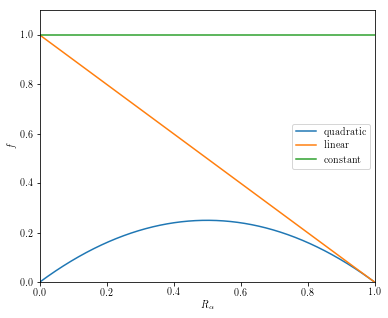

In [7]:
def fun(gamma,R):
    return R**gamma/(R**gamma+1.0)
R=np.linspace(0,1,1000)
fig = matplotlib.pyplot.gcf()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(R,R*(1-R), label= 'quadratic',c=tableau20[0])
plt.plot(R,1-R, label= 'linear',c=tableau20[2])
plt.plot(R, 1.0*np.ones(len(R)), label= 'constant',c=tableau20[4])
plt.xlabel(r'$\displaystyle R_\alpha$')    
plt.ylabel(r'$\displaystyle f$') 
plt.xlim(left=0)
plt.xlim(right=1.0)
plt.ylim(bottom=0)
plt.ylim(top=1.1)
plt.legend()
fig.set_size_inches(6, 5)
fig.savefig('figures/resource_function.pdf', dpi=100)
plt.show()

## simulations of quadratic resource dynamics $R_\alpha(K_\alpha-R_\alpha)$ in one dimension at different intitial conditions

When the initial of N is small(1.0), the final state of resource R is nonzero;

While if the initial of N is quit large(100.0), , the final state of resource R is zero;

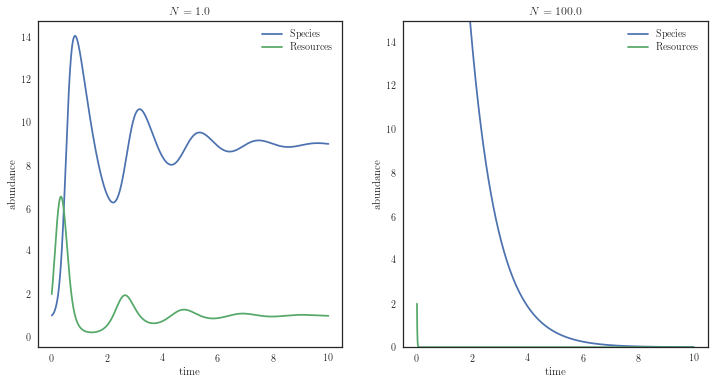

In [7]:
def func(N_ini):
    def Dynamics(Y, t, par):
        N, R = Y[0], Y[1]
        if R<0:
           R=0 
        if N<0:
           N=0
        [growth, tau_i, C, Cost,tau_alpha, K,tau_i] = par;
        Nt= N * growth * (C*R - Cost) 
        Rt= 1./tau_alpha*R*(K - R)-R*growth/tau_alpha*N*C
        output_vector = [Nt, Rt];
        return output_vector  
    growth=1.0; # the growth rate for the species.
    tau_i=1.;  # the time scale for consumption rate.
    C=1.0;      # the consumption rate
    Cost=1.0;   # maintenance cost
    tau_alpha=1.; # the time scale for resources.
    K=10.0;
    par=[growth, tau_i, C, Cost,tau_alpha, K,tau_i]
    t0 = 0;
    t1 = 10;
    Nt = 4000;
    T = np.linspace(t0, t1, num=Nt);
    R_ini=2.;
    Y = odeint(Dynamics, [N_ini,R_ini], T, args=(par,),mxstep=5000, atol=10 ** -6)
    return T, Y[:,0], Y[:,1]
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
T,Nt,Rt=func(1.0)
ax1.plot(T, Nt,label='Species')
ax1.plot(T, Rt,label='Resources')
ax1.title.set_text(r'$\displaystyle N=1.0$')
ax1.legend()
ax1.set_xlabel('time')
ax1.set_ylabel('abundance')
T,Nt,Rt=func(100.0)
ax2.plot(T, Nt,label='Species')
ax2.plot(T, Rt,label='Resources')
ax2.set_ylim([0,15])
ax2.title.set_text(r'$\displaystyle N=100.0$')
ax2.set_xlabel('time')
ax2.set_ylabel('abundance')
ax2.legend()
f.set_size_inches(12, 6)
plt.show()

## Check about R(N)=K/(1+N*C) about Lyapunov function in linear resource dynamics

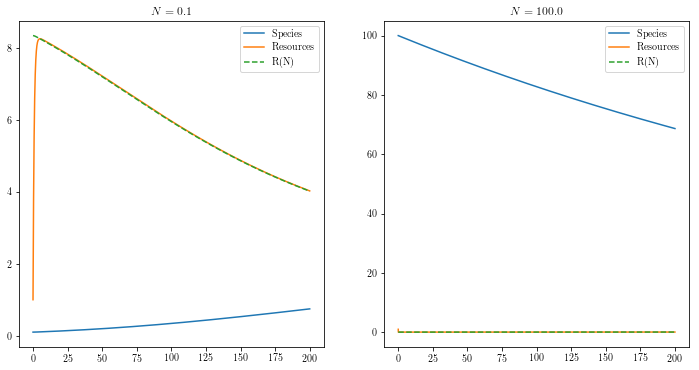

In [95]:
def fun(N_ini):
    def Dynamics(Y, t, par):
        N, R = Y[0], Y[1]
        if R<0:
           R=0 
        if N<0:
           N=0
        [growth, tau_i, C, Cost,tau_alpha, K,tau_i] = par;
        Nt= N * growth * (C*R - Cost) 
        Rt= 1./tau_alpha*(K - R) - 1./tau_alpha*R*N*C
        output_vector = [Nt, Rt];
        return output_vector  
    growth=0.001; # the growth rate for the species.
    tau_i=1.;  # the time scale for consumption rate.
    C=2.0;      # the consumption rate
    Cost=2.0;   # maintenance cost
    tau_alpha=1.; # the time scale for resources.
    K=10.0;
    par=[growth, tau_i, C, Cost,tau_alpha, K,tau_i]
    t0 = 0;
    t1 = 200;
    Nt = 4000;
    T = np.linspace(t0, t1, num=Nt);
    R_ini=1.;
    Y = odeint(Dynamics, [N_ini,R_ini], T, args=(par,),mxstep=5000, atol=10 ** -6)
    return T, Y[:,0], Y[:,1],K/(1+C*Y[:,0])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
T,Rt,Nt,RN=fun(0.1)
ax1.plot(T, Rt,label='Species')
ax1.plot(T, Nt,label='Resources')
ax1.plot(T,RN ,label='R(N)',linestyle='--')
ax1.title.set_text(r'$\displaystyle N=0.1$')
ax1.legend()
T,Rt,Nt,RN=fun(100.0)
ax2.plot(T, Rt,label='Species')
ax2.plot(T, Nt,label='Resources')
ax2.plot(T,RN ,label='R(N)',linestyle='--')
ax2.title.set_text(r'$\displaystyle N=100.0$')
ax2.legend()
f.set_size_inches(12, 6)
plt.show()

## Simulation about two speices: Lyapunov Function in different dynamics

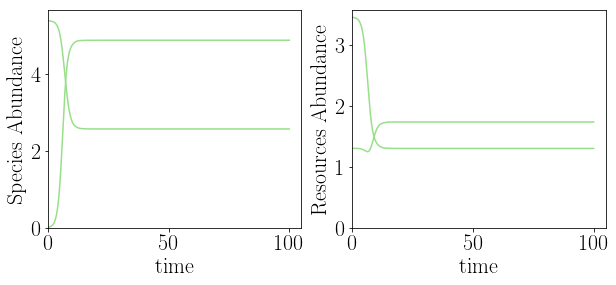

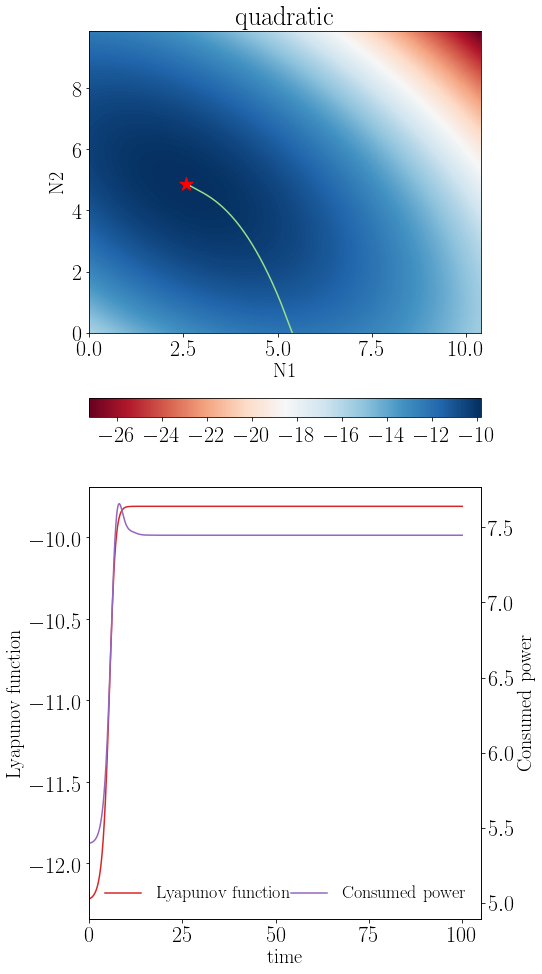

In [77]:
## Initial the number of species and resources
S=2;M=2;
fontsize=20;
flag='quadratic'#'constant', 'linear', 'quadratic'
flag_crossfeeding = False; # simulation with crossfeeding or not.
K =4*np.asarray([1.0, 1.0])  # Initial the number of species and resources
deltaE=1.0
energies = deltaE*np.ones(M)
tau_inv = 1.*np.ones(M)
#Ode solver parameter
t0 = 0;
t1 = 100;
N_t = 4000;
T_par = [t0, t1, N_t];
T = np.linspace(t0, t1, num=N_t);
R_ini = 0.2 * np.ones(M);
# Start to simulate
C=np.asarray([[0.1, 0.5],[0.5,0.2]])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
costs=1*np.ones(M)
growth=1*np.ones(S)
# Start to simulate
N_ini = np.asarray([1.,0.])
if flag=='constant':
    flag_nonvanish=True;
    flag_renew=True;
    label='constant'
elif flag=='linear':
    flag_renew=True;
    flag_nonvanish=False;
    label='linear'
elif flag=='quadratic':
    flag_renew=False;
    flag_nonvanish=False;
    label='quadratic'
fig_name = "figures/"+label+"_Functions"+ str(M)+timestr+".pdf"    
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()

N_ini = np.asarray([Nt[-1,0], 0.01])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
columns=['Fig Name','Resource Dynamics','crossfeeding','Number of Resources','Number of Species','R_ini','N_ini','T_par', 'C', 'energies', 'tau_inv', 'costs', 'growth', 'K']
para_df_current = pd.DataFrame([[fig_name,flag,flag_crossfeeding, S, M, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K  ]],columns=columns)
appendDFToCSV_void(para_df_current, csvFilePath='Sample_record.csv', sep=",")   
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()


fig, (ax1,ax2) = plt.subplots(1,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax1.plot(T, Nt, color=tableau20[5])
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time')
ax1.set_ylabel('Species Abundance')

ax2.plot(T, Rt, color=tableau20[5])
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)
ax2.set_xlabel('time')
ax2.set_ylabel('Resources Abundance')
fig.set_size_inches(10, 4)
plt.show()

ci=5
N1= np.linspace(0.1, Nt[:,0].max()+5, 100)
N2 = np.linspace(0.1, Nt[:,1].max()+5, 100)
def C_potential(N1, N2, flag):
    if flag=='constant':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) 
    elif flag=='linear':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])
    elif flag=='quadratic':
       potential=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/(2*tau_inv[1])*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2  
    return potential
def Consumed_p(N1, N2):
    return N1*costs[0]+N2*costs[1]
def Lyapunov(N1, N2, flag):
    if flag=='constant':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) -N1*costs[0]-N2*costs[1] 
    elif flag=='linear':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])-N1*costs[0]-N2*costs[1]
    elif flag=='quadratic':
       Lya=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/2.*tau_inv[1]*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2-N1*costs[0]-N2*costs[1]  
    return Lya
X,Y = np.meshgrid(N1, N2)
Z_Lya = Lyapunov(X, Y, flag)
Z_p=Consumed_p(X, Y)
Z_C=C_potential(X, Y, flag)

fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax21 = ax2.twinx()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 22})
ax1.set_ylabel('N2',fontsize=fontsize)
ax1.set_xlabel('N1',fontsize=fontsize)
ax1.plot(Nt[:,0], Nt[:,1], color=tableau20[ci])
ax1.scatter(Model.N_f[0],Model.N_f[1], s =200, marker ="*", c='r' ,zorder=100)
ax1.title.set_text(flag)
#CS=ax1.contour(X, Y, Z_Lya, levels=np.linspace(Z_Lya.min(), Z_Lya.max(), 10), cmap="RdYlBu_r")
#ax1.set_xlim(left=0)
#plt.clabel(CS, inline=1, fontsize=10)
im = ax1.imshow(Z_Lya, cmap=cm.RdBu, vmin=Z_Lya.min(), vmax=Z_Lya.max(), extent=[0, N1.max(), 0, N2.max()],aspect='auto',origin='lower')
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax1, orientation='horizontal')
ax1.set_aspect('auto')
ax1.set_xlim(left=0)
Lyapunov_t=[]
for i in range(N_t):
    Lyapunov_t.append(Lyapunov(Nt[i,0], Nt[i,1],flag))
ax2.plot(T, Lyapunov_t,c=tableau20[6],label='Lyapunov function')
ax2.set_ylabel('Lyapunov function',fontsize=fontsize)
ax2.set_xlabel('time',fontsize=fontsize)
ax2.set_xlim(left=0)


Con_t=[]
for i in range(N_t):
    Con_t.append(Consumed_p(Nt[i,0], Nt[i,1]))
ax21.plot(T, Con_t,c=tableau20[8], label='Consumed power')
ax21.set_ylabel('Consumed power',fontsize=fontsize)
ax21.set_xlabel('time',fontsize=fontsize)
ax21.set_xlim(left=0)
ax21.set_ylim(bottom=min(Con_t)-0.5)
legend = ax2.legend(frameon=False,loc='lower left', fontsize=18)
legend = ax21.legend(loc='lower right', frameon=False, fontsize=18)
fig.set_size_inches(8, 14)
fig.tight_layout()
fig.savefig(fig_name, dpi=100)
plt.show()

### Oscillation at quadratic resource dynamics 

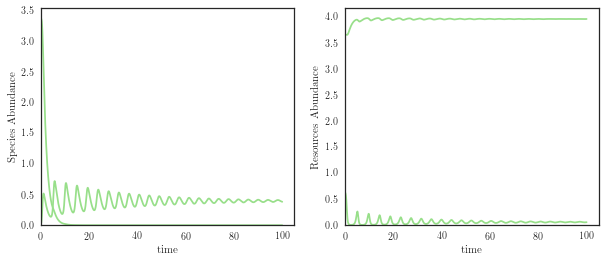

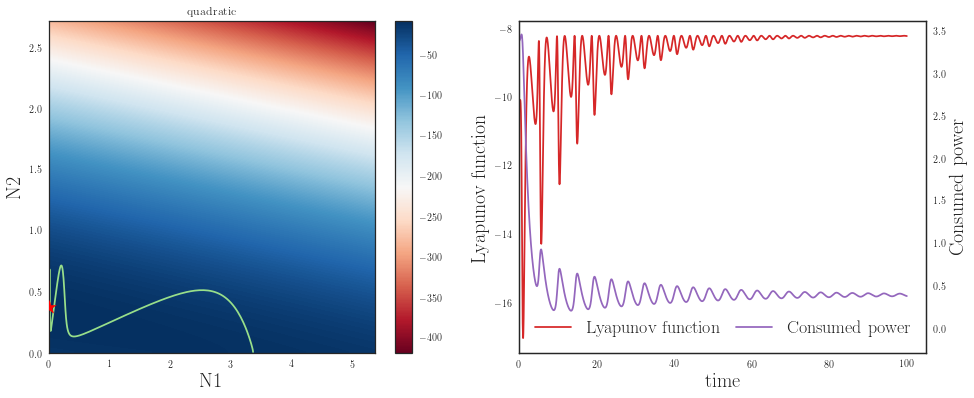

In [14]:
## Initial the number of species and resources
S=2;M=2;
fontsize=20;
flag='quadratic'#'constant', 'linear', 'quadratic'
flag_crossfeeding = False; # simulation with crossfeeding or not.
K =4*np.asarray([1.0, 1.0])  # Initial the number of species and resources
deltaE=1.0
energies = deltaE*np.ones(M)
tau_inv = 1.*np.ones(M)
#Ode solver parameter
t0 = 0;
t1 = 100;
N_t = 4000;
T_par = [t0, t1, N_t];
T = np.linspace(t0, t1, num=N_t);
R_ini = 0.2 * np.ones(M);
# Start to simulate
C=np.asarray([[0.1, 1.0],[0.1,10.]])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
costs=1*np.ones(M)
growth=1*np.ones(S)
# Start to simulate
N_ini = np.asarray([1.,0.])
if flag=='constant':
    flag_nonvanish=True;
    flag_renew=True;
    label='constant'
elif flag=='linear':
    flag_renew=True;
    flag_nonvanish=False;
    label='linear'
elif flag=='quadratic':
    flag_renew=False;
    flag_nonvanish=False;
    label='quadratic'
fig_name = "figures/"+label+"Oscillation_Functions"+ str(M)+timestr+".pdf"    
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()

N_ini = np.asarray([Nt[-1,0], 0.01])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
columns=['Fig Name','Resource Dynamics','crossfeeding','Number of Resources','Number of Species','R_ini','N_ini','T_par', 'C', 'energies', 'tau_inv', 'costs', 'growth', 'K']
para_df_current = pd.DataFrame([[fig_name,flag,flag_crossfeeding, S, M, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K  ]],columns=columns)
appendDFToCSV_void(para_df_current, csvFilePath='Sample_record.csv', sep=",")   
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()


fig, (ax1,ax2) = plt.subplots(1,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax1.plot(T, Nt, color=tableau20[5])
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time')
ax1.set_ylabel('Species Abundance')

ax2.plot(T, Rt, color=tableau20[5])
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)
ax2.set_xlabel('time')
ax2.set_ylabel('Resources Abundance')
fig.set_size_inches(10, 4)
plt.show()

ci=5
N1= np.linspace(0.1, Nt[:,0].max()+2, 100)
N2 = np.linspace(0.1, Nt[:,1].max()+2, 100)
def C_potential(N1, N2, flag):
    if flag=='constant':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) 
    elif flag=='linear':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])
    elif flag=='quadratic':
       potential=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/(2*tau_inv[1])*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2  
    return potential
def Consumed_p(N1, N2):
    return N1*costs[0]+N2*costs[1]
def Lyapunov(N1, N2, flag):
    if flag=='constant':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) -N1*costs[0]-N2*costs[1] 
    elif flag=='linear':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])-N1*costs[0]-N2*costs[1]
    elif flag=='quadratic':
       Lya=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/2.*tau_inv[1]*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2-N1*costs[0]-N2*costs[1]  
    return Lya
X,Y = np.meshgrid(N1, N2)
Z_Lya = Lyapunov(X, Y, flag)
Z_p=Consumed_p(X, Y)
Z_C=C_potential(X, Y, flag)

fig, (ax1, ax2) = plt.subplots(1,2)
ax21 = ax2.twinx()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 22})
ax1.set_ylabel('N2',fontsize=fontsize)
ax1.set_xlabel('N1',fontsize=fontsize)
ax1.plot(Nt[:,0], Nt[:,1], color=tableau20[ci])
ax1.scatter(Model.N_f[0],Model.N_f[1], s =200, marker ="*", c='r' ,zorder=100)
ax1.title.set_text(flag)
#CS=ax1.contour(X, Y, Z_Lya, levels=np.linspace(Z_Lya.min(), Z_Lya.max(), 10), cmap="RdYlBu_r")
#ax1.set_xlim(left=0)
#plt.clabel(CS, inline=1, fontsize=10)
im = ax1.imshow(Z_Lya, cmap=cm.RdBu, vmin=Z_Lya.min(), vmax=Z_Lya.max(), extent=[0, N1.max(), 0, N2.max()],aspect='auto',origin='lower')
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax1)
ax1.set_aspect('auto')
ax1.set_xlim(left=0)
Lyapunov_t=[]
for i in range(N_t):
    Lyapunov_t.append(Lyapunov(Nt[i,0], Nt[i,1],flag))
ax2.plot(T, Lyapunov_t,c=tableau20[6],label='Lyapunov function')
ax2.set_ylabel('Lyapunov function',fontsize=fontsize)
ax2.set_xlabel('time',fontsize=fontsize)
ax2.set_xlim(left=0)


Con_t=[]
for i in range(N_t):
    Con_t.append(Consumed_p(Nt[i,0], Nt[i,1]))
ax21.plot(T, Con_t,c=tableau20[8], label='Consumed power')
ax21.set_ylabel('Consumed power',fontsize=fontsize)
ax21.set_xlabel('time',fontsize=fontsize)
ax21.set_xlim(left=0)
ax21.set_ylim(bottom=min(Con_t)-0.5)
legend = ax2.legend(frameon=False,loc='lower left', fontsize=18)
legend = ax21.legend(loc='lower right', frameon=False, fontsize=18)
fig.set_size_inches(14, 6)
fig.tight_layout()
fig.savefig(fig_name, dpi=100)
plt.show()

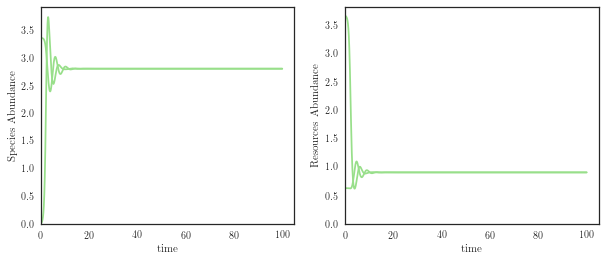

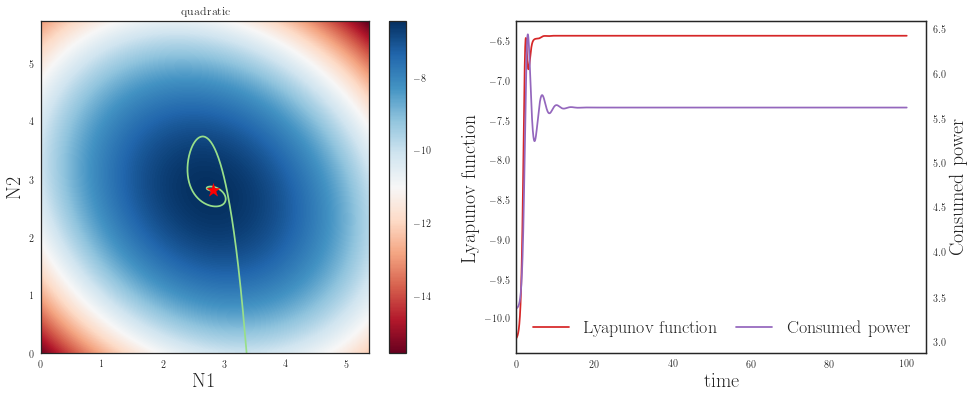

In [13]:
## Initial the number of species and resources
S=2;M=2;
fontsize=20;
flag='quadratic'#'constant', 'linear', 'quadratic'
flag_crossfeeding = False; # simulation with crossfeeding or not.
K =4*np.asarray([1.0, 1.0])  # Initial the number of species and resources
deltaE=1.0
energies = deltaE*np.ones(M)
tau_inv = 1.*np.ones(M)
#Ode solver parameter
t0 = 0;
t1 = 100;
N_t = 4000;
T_par = [t0, t1, N_t];
T = np.linspace(t0, t1, num=N_t);
R_ini = 0.2 * np.ones(M);
# Start to simulate
C=np.asarray([[0.1, 1.0],[1.,0.1]])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
costs=1*np.ones(M)
growth=1*np.ones(S)
# Start to simulate
N_ini = np.asarray([1.,0.])
if flag=='constant':
    flag_nonvanish=True;
    flag_renew=True;
    label='constant'
elif flag=='linear':
    flag_renew=True;
    flag_nonvanish=False;
    label='linear'
elif flag=='quadratic':
    flag_renew=False;
    flag_nonvanish=False;
    label='quadratic'
fig_name = "figures/"+label+"Oscillation_Functions"+ str(M)+timestr+".pdf"    
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()

N_ini = np.asarray([Nt[-1,0], 0.01])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
columns=['Fig Name','Resource Dynamics','crossfeeding','Number of Resources','Number of Species','R_ini','N_ini','T_par', 'C', 'energies', 'tau_inv', 'costs', 'growth', 'K']
para_df_current = pd.DataFrame([[fig_name,flag,flag_crossfeeding, S, M, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K  ]],columns=columns)
appendDFToCSV_void(para_df_current, csvFilePath='Sample_record.csv', sep=",")   
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()


fig, (ax1,ax2) = plt.subplots(1,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax1.plot(T, Nt, color=tableau20[5])
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time')
ax1.set_ylabel('Species Abundance')

ax2.plot(T, Rt, color=tableau20[5])
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)
ax2.set_xlabel('time')
ax2.set_ylabel('Resources Abundance')
fig.set_size_inches(10, 4)
plt.show()

ci=5
N1= np.linspace(0.1, Nt[:,0].max()+2, 100)
N2 = np.linspace(0.1, Nt[:,1].max()+2, 100)
def C_potential(N1, N2, flag):
    if flag=='constant':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) 
    elif flag=='linear':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])
    elif flag=='quadratic':
       potential=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/(2*tau_inv[1])*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2  
    return potential
def Consumed_p(N1, N2):
    return N1*costs[0]+N2*costs[1]
def Lyapunov(N1, N2, flag):
    if flag=='constant':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) -N1*costs[0]-N2*costs[1] 
    elif flag=='linear':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])-N1*costs[0]-N2*costs[1]
    elif flag=='quadratic':
       Lya=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/2.*tau_inv[1]*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2-N1*costs[0]-N2*costs[1]  
    return Lya
X,Y = np.meshgrid(N1, N2)
Z_Lya = Lyapunov(X, Y, flag)
Z_p=Consumed_p(X, Y)
Z_C=C_potential(X, Y, flag)

fig, (ax1, ax2) = plt.subplots(1,2)
ax21 = ax2.twinx()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 22})
ax1.set_ylabel('N2',fontsize=fontsize)
ax1.set_xlabel('N1',fontsize=fontsize)
ax1.plot(Nt[:,0], Nt[:,1], color=tableau20[ci])
ax1.scatter(Model.N_f[0],Model.N_f[1], s =200, marker ="*", c='r' ,zorder=100)
ax1.title.set_text(flag)
#CS=ax1.contour(X, Y, Z_Lya, levels=np.linspace(Z_Lya.min(), Z_Lya.max(), 10), cmap="RdYlBu_r")
#ax1.set_xlim(left=0)
#plt.clabel(CS, inline=1, fontsize=10)
im = ax1.imshow(Z_Lya, cmap=cm.RdBu, vmin=Z_Lya.min(), vmax=Z_Lya.max(), extent=[0, N1.max(), 0, N2.max()],aspect='auto',origin='lower')
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax1)
ax1.set_aspect('auto')
ax1.set_xlim(left=0)
Lyapunov_t=[]
for i in range(N_t):
    Lyapunov_t.append(Lyapunov(Nt[i,0], Nt[i,1],flag))
ax2.plot(T, Lyapunov_t,c=tableau20[6],label='Lyapunov function')
ax2.set_ylabel('Lyapunov function',fontsize=fontsize)
ax2.set_xlabel('time',fontsize=fontsize)
ax2.set_xlim(left=0)


Con_t=[]
for i in range(N_t):
    Con_t.append(Consumed_p(Nt[i,0], Nt[i,1]))
ax21.plot(T, Con_t,c=tableau20[8], label='Consumed power')
ax21.set_ylabel('Consumed power',fontsize=fontsize)
ax21.set_xlabel('time',fontsize=fontsize)
ax21.set_xlim(left=0)
ax21.set_ylim(bottom=min(Con_t)-0.5)
legend = ax2.legend(frameon=False,loc='lower left', fontsize=18)
legend = ax21.legend(loc='lower right', frameon=False, fontsize=18)
fig.set_size_inches(14, 6)
fig.tight_layout()
fig.savefig(fig_name, dpi=100)
plt.show()

### Consumed power decreases at quadratic resource dynamics 

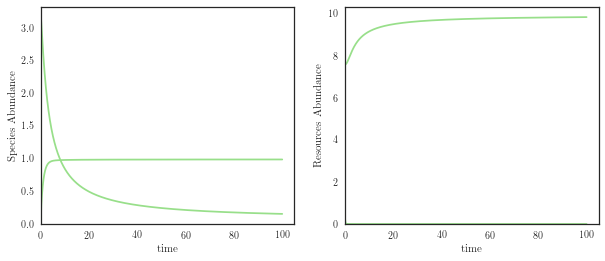

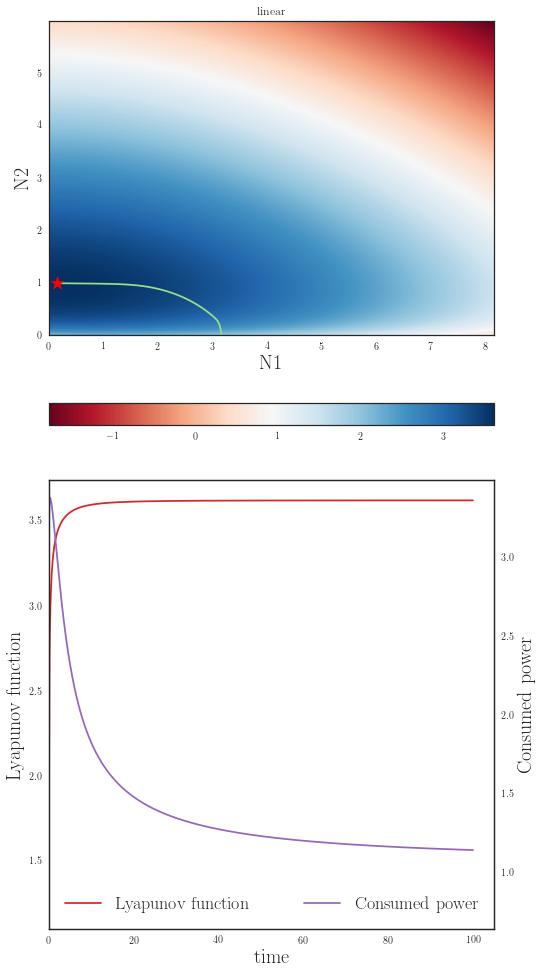

In [90]:
## Initial the number of species and resources
S=2;M=2;
fontsize=20;
flag='linear'#'constant', 'linear', 'quadratic'
flag_crossfeeding = False; # simulation with crossfeeding or not.
K =1*np.asarray([10.0, 1.0])  # Initial the number of species and resources
deltaE=1.0
energies = deltaE*np.ones(M)
tau_inv = 1.*np.ones(M)
#Ode solver parameter
t0 = 0;
t1 = 100;
N_t = 4000;
T_par = [t0, t1, N_t];
T = np.linspace(t0, t1, num=N_t);
R_ini = 0.2 * np.ones(M);
# Start to simulate
C=np.asarray([[0.1, 1.0],[0.0,100.]])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
costs=1*np.ones(M)
growth=1*np.ones(S)
# Start to simulate
N_ini = np.asarray([1.,0.])
if flag=='constant':
    flag_nonvanish=True;
    flag_renew=True;
    label='constant'
elif flag=='linear':
    flag_renew=True;
    flag_nonvanish=False;
    label='linear'
elif flag=='quadratic':
    flag_renew=False;
    flag_nonvanish=False;
    label='quadratic'
fig_name = "figures/"+label+"_Functions"+ str(M)+timestr+".pdf"    
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()

N_ini = np.asarray([Nt[-1,0], 0.01])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
columns=['Fig Name','Resource Dynamics','crossfeeding','Number of Resources','Number of Species','R_ini','N_ini','T_par', 'C', 'energies', 'tau_inv', 'costs', 'growth', 'K']
para_df_current = pd.DataFrame([[fig_name,flag,flag_crossfeeding, S, M, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K  ]],columns=columns)
appendDFToCSV_void(para_df_current, csvFilePath='Sample_record.csv', sep=",")   
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()


fig, (ax1,ax2) = plt.subplots(1,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax1.plot(T, Nt, color=tableau20[5])
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time')
ax1.set_ylabel('Species Abundance')

ax2.plot(T, Rt, color=tableau20[5])
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)
ax2.set_xlabel('time')
ax2.set_ylabel('Resources Abundance')
fig.set_size_inches(10, 4)
plt.show()

ci=5
N1= np.linspace(0.1, Nt[:,0].max()+5, 100)
N2 = np.linspace(0.1, Nt[:,1].max()+5, 100)
def C_potential(N1, N2, flag):
    if flag=='constant':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) 
    elif flag=='linear':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])
    elif flag=='quadratic':
       potential=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/(2*tau_inv[1])*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2  
    return potential
def Consumed_p(N1, N2):
    return N1*costs[0]+N2*costs[1]
def Lyapunov(N1, N2, flag):
    if flag=='constant':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) -N1*costs[0]-N2*costs[1] 
    elif flag=='linear':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])-N1*costs[0]-N2*costs[1]
    elif flag=='quadratic':
       Lya=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/2.*tau_inv[1]*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2-N1*costs[0]-N2*costs[1]  
    return Lya
X,Y = np.meshgrid(N1, N2)
Z_Lya = Lyapunov(X, Y, flag)
Z_p=Consumed_p(X, Y)
Z_C=C_potential(X, Y, flag)

fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax21 = ax2.twinx()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 22})
ax1.set_ylabel('N2',fontsize=fontsize)
ax1.set_xlabel('N1',fontsize=fontsize)
ax1.plot(Nt[:,0], Nt[:,1], color=tableau20[ci])
ax1.scatter(Model.N_f[0],Model.N_f[1], s =200, marker ="*", c='r' ,zorder=100)
ax1.title.set_text(flag)
#CS=ax1.contour(X, Y, Z_Lya, levels=np.linspace(Z_Lya.min(), Z_Lya.max(), 10), cmap="RdYlBu_r")
#ax1.set_xlim(left=0)
#plt.clabel(CS, inline=1, fontsize=10)
im = ax1.imshow(Z_Lya, cmap=cm.RdBu, vmin=Z_Lya.min(), vmax=Z_Lya.max(), extent=[0, N1.max(), 0, N2.max()],aspect='auto',origin='lower')
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax1, orientation='horizontal')
ax1.set_aspect('auto')
ax1.set_xlim(left=0)
Lyapunov_t=[]
for i in range(N_t):
    Lyapunov_t.append(Lyapunov(Nt[i,0], Nt[i,1],flag))
ax2.plot(T, Lyapunov_t,c=tableau20[6],label='Lyapunov function')
ax2.set_ylabel('Lyapunov function',fontsize=fontsize)
ax2.set_xlabel('time',fontsize=fontsize)
ax2.set_xlim(left=0)


Con_t=[]
for i in range(N_t):
    Con_t.append(Consumed_p(Nt[i,0], Nt[i,1]))
ax21.plot(T, Con_t,c=tableau20[8], label='Consumed power')
ax21.set_ylabel('Consumed power',fontsize=fontsize)
ax21.set_xlabel('time',fontsize=fontsize)
ax21.set_xlim(left=0)
ax21.set_ylim(bottom=min(Con_t)-0.5)
legend = ax2.legend(frameon=False,loc='lower left', fontsize=18)
legend = ax21.legend(loc='lower right', frameon=False, fontsize=18)
fig.set_size_inches(8, 14)
fig.tight_layout()
fig.savefig(fig_name, dpi=100)
plt.show()

### how the asymmetry of local specie breakes maximize consumed power rule

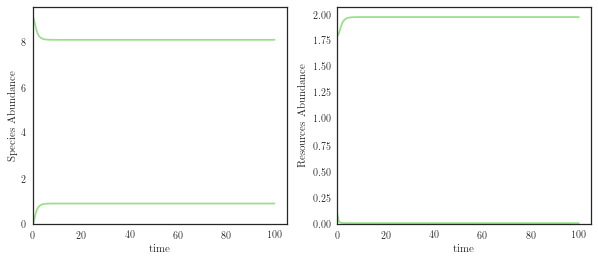

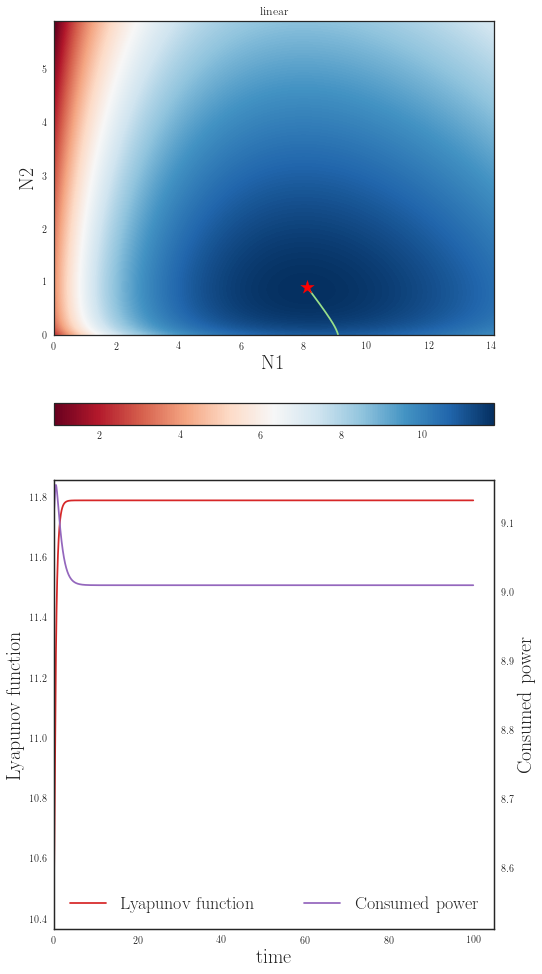

In [91]:
## Initial the number of species and resources
S=2;M=2;
fontsize=20;
flag='linear'#'constant', 'linear', 'quadratic'
flag_crossfeeding = False; # simulation with crossfeeding or not.
K =1*np.asarray([10.0, 1.0])  # Initial the number of species and resources
deltaE=1.0
energies = deltaE*np.ones(M)
tau_inv = 1.*np.ones(M)
#Ode solver parameter
t0 = 0;
t1 = 100;
N_t = 4000;
T_par = [t0, t1, N_t];
T = np.linspace(t0, t1, num=N_t);
R_ini = 0.2 * np.ones(M);
# Start to simulate
C=np.asarray([[0.5, 1.0],[0.0,100.]])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
costs=1*np.ones(M)
growth=1*np.ones(S)
# Start to simulate
N_ini = np.asarray([1.,0.])
if flag=='constant':
    flag_nonvanish=True;
    flag_renew=True;
    label='constant'
elif flag=='linear':
    flag_renew=True;
    flag_nonvanish=False;
    label='linear'
elif flag=='quadratic':
    flag_renew=False;
    flag_nonvanish=False;
    label='quadratic'
fig_name = "figures/"+label+"_Functions"+ str(M)+timestr+".pdf"    
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()

N_ini = np.asarray([Nt[-1,0], 0.01])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
R_ini = np.asarray([Rt[-1,0], Rt[-1,1]])
columns=['Fig Name','Resource Dynamics','crossfeeding','Number of Resources','Number of Species','R_ini','N_ini','T_par', 'C', 'energies', 'tau_inv', 'costs', 'growth', 'K']
para_df_current = pd.DataFrame([[fig_name,flag,flag_crossfeeding, S, M, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K  ]],columns=columns)
appendDFToCSV_void(para_df_current, csvFilePath='Sample_record.csv', sep=",")   
sim_par = [flag_crossfeeding, M, S, R_ini, N_ini,T_par, C, energies, tau_inv, costs, growth, K] 
Model =Ecology_simulation(sim_par)
Model.flag_renew=flag_renew;
Model.flag_nonvanish=flag_nonvanish;
Rt, Nt=Model.simulation()


fig, (ax1,ax2) = plt.subplots(1,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax1.plot(T, Nt, color=tableau20[5])
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time')
ax1.set_ylabel('Species Abundance')

ax2.plot(T, Rt, color=tableau20[5])
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)
ax2.set_xlabel('time')
ax2.set_ylabel('Resources Abundance')
fig.set_size_inches(10, 4)
plt.show()

ci=5
N1= np.linspace(0.1, Nt[:,0].max()+5, 100)
N2 = np.linspace(0.1, Nt[:,1].max()+5, 100)
def C_potential(N1, N2, flag):
    if flag=='constant':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) 
    elif flag=='linear':
       potential=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])
    elif flag=='quadratic':
       potential=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/(2*tau_inv[1])*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2  
    return potential
def Consumed_p(N1, N2):
    return N1*costs[0]+N2*costs[1]
def Lyapunov(N1, N2, flag):
    if flag=='constant':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1]) -N1*costs[0]-N2*costs[1] 
    elif flag=='linear':
       Lya=K[0]*energies[0]*tau_inv[0]*np.log(1+N1*C[0,0]/tau_inv[0]+N2*C[1,0]/tau_inv[0])+K[1]*energies[1]*tau_inv[1]*np.log(1+N1*C[0,1]/tau_inv[1]+N2*C[1,1]/tau_inv[1])-N1*costs[0]-N2*costs[1]
    elif flag=='quadratic':
       Lya=-energies[0]/2.*tau_inv[0]*(K[0]-N1*C[0,0]/tau_inv[0]-N2*C[1,0]/tau_inv[0])**2-energies[1]/2.*tau_inv[1]*(K[1]-N1*C[0,1]/tau_inv[1]-N2*C[1,1]/tau_inv[1])**2-N1*costs[0]-N2*costs[1]  
    return Lya
X,Y = np.meshgrid(N1, N2)
Z_Lya = Lyapunov(X, Y, flag)
Z_p=Consumed_p(X, Y)
Z_C=C_potential(X, Y, flag)

fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax21 = ax2.twinx()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 22})
ax1.set_ylabel('N2',fontsize=fontsize)
ax1.set_xlabel('N1',fontsize=fontsize)
ax1.plot(Nt[:,0], Nt[:,1], color=tableau20[ci])
ax1.scatter(Model.N_f[0],Model.N_f[1], s =200, marker ="*", c='r' ,zorder=100)
ax1.title.set_text(flag)
#CS=ax1.contour(X, Y, Z_Lya, levels=np.linspace(Z_Lya.min(), Z_Lya.max(), 10), cmap="RdYlBu_r")
#ax1.set_xlim(left=0)
#plt.clabel(CS, inline=1, fontsize=10)
im = ax1.imshow(Z_Lya, cmap=cm.RdBu, vmin=Z_Lya.min(), vmax=Z_Lya.max(), extent=[0, N1.max(), 0, N2.max()],aspect='auto',origin='lower')
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax1, orientation='horizontal')
ax1.set_aspect('auto')
ax1.set_xlim(left=0)
Lyapunov_t=[]
for i in range(N_t):
    Lyapunov_t.append(Lyapunov(Nt[i,0], Nt[i,1],flag))
ax2.plot(T, Lyapunov_t,c=tableau20[6],label='Lyapunov function')
ax2.set_ylabel('Lyapunov function',fontsize=fontsize)
ax2.set_xlabel('time',fontsize=fontsize)
ax2.set_xlim(left=0)


Con_t=[]
for i in range(N_t):
    Con_t.append(Consumed_p(Nt[i,0], Nt[i,1]))
ax21.plot(T, Con_t,c=tableau20[8], label='Consumed power')
ax21.set_ylabel('Consumed power',fontsize=fontsize)
ax21.set_xlabel('time',fontsize=fontsize)
ax21.set_xlim(left=0)
ax21.set_ylim(bottom=min(Con_t)-0.5)
legend = ax2.legend(frameon=False,loc='lower left', fontsize=18)
legend = ax21.legend(loc='lower right', frameon=False, fontsize=18)
fig.set_size_inches(8, 14)
fig.tight_layout()
fig.savefig(fig_name, dpi=100)
plt.show()